In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedShuffleSplit,KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor

# 1. Data Preprocessing

## 1.1 Import & Combine the Data

In [ ]:
nse_data_2007 = pd.read_csv('drive/MyDrive/CS 4.1/KNOWLEDGE BASED SYSTEMS/Assignments//Nairobi Securities Exchange All Stocks Prices 2007-2012/NSE_data_all_stocks_2007.csv', thousands=',',
    na_values='-')
nse_data_2008 = pd.read_csv('drive/MyDrive/CS 4.1/KNOWLEDGE BASED SYSTEMS/Assignments//Nairobi Securities Exchange All Stocks Prices 2007-2012/NSE_data_all_stocks_2008.csv', thousands=',',
    na_values='-')
nse_data_2009 = pd.read_csv('drive/MyDrive/CS 4.1/KNOWLEDGE BASED SYSTEMS/Assignments//Nairobi Securities Exchange All Stocks Prices 2007-2012/NSE_data_all_stocks_2009.csv', thousands=',',
    na_values='-')
nse_data_2010 = pd.read_csv('drive/MyDrive/CS 4.1/KNOWLEDGE BASED SYSTEMS/Assignments//Nairobi Securities Exchange All Stocks Prices 2007-2012/NSE_data_all_stocks_2010.csv', thousands=',',
    na_values='-')
nse_data_2011 = pd.read_csv('drive/MyDrive/CS 4.1/KNOWLEDGE BASED SYSTEMS/Assignments//Nairobi Securities Exchange All Stocks Prices 2007-2012/NSE_data_all_stocks_2011.csv', thousands=',',
    na_values='-')
nse_data_2012 = pd.read_csv('drive/MyDrive/CS 4.1/KNOWLEDGE BASED SYSTEMS/Assignments//Nairobi Securities Exchange All Stocks Prices 2007-2012/NSE_data_all_stocks_2012.csv', thousands=',',
    na_values='-')

combined_data = pd.concat([nse_data_2007, nse_data_2008, nse_data_2009, nse_data_2010, nse_data_2011, nse_data_2012],
                          ignore_index=True);

display(combined_data.head())


,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date,Adjusted
0,1/2/2007,EGAD,Eaagads,22.0,57.0,52.0,52.0,52.0,52.00,NaN,NaN,300,26.00,NaN,NaN
1,1/2/2007,KAPC,Kapchorua Tea,111.0,148.0,100.0,100.0,100.0,98.50,1.50,1.50%,7800,NaN,NaN,NaN
2,1/2/2007,KUKZ,Kakuzi,67.5,89.0,42.5,45.0,43.5,42.25,1.25,2.87%,2700,NaN,NaN,NaN
3,1/2/2007,REA,Rea Vipingo Plantations,14.5,23.5,25.0,26.5,25.5,25.75,-0.25,0.98%,10500,NaN,NaN,NaN
4,1/2/2007,SASN,Sasini Tea and Coffee,10.5,13.6,140.0,145.0,140.0,141.00,-1.00,0.71%,70900,23.33,NaN,NaN


In [ ]:
# Filter to use ARM(Athi River Mining)
arm_data = combined_data[combined_data['CODE'] == 'ARM']

display(arm_data.head())


,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date,Adjusted
25,1/2/2007,ARM,Athi River Mining,32.0,74.0,78.0,84.0,81.5,82.0,-0.5,0.61%,18400,16.3,NaN,NaN
70,1/3/2007,ARM,Athi River Mining,33.2,74.0,79.5,84.0,83.0,81.5,1.5,1.81%,36500,16.6,NaN,NaN
115,1/4/2007,ARM,Athi River Mining,32.0,74.0,80.0,84.0,82.5,83.0,-0.5,0.61%,39500,16.5,NaN,NaN
159,1/5/2007,ARM,Athi River Mining,33.2,74.0,80.0,86.0,83.5,82.5,1.0,1.20%,56500,16.7,NaN,NaN
202,1/8/2007,ARM,Athi River Mining,33.2,74.0,84.0,88.0,85.0,83.5,1.5,1.76%,49100,17.0,NaN,NaN


## 1.2 Identify Missing Values

In [ ]:
arm_data = arm_data[['DATE', 'CODE', '12m Low', '12m High', 'Day Low', 'Day High', 'Previous', 'Day Price']]
arm_data.isna().sum()

,0
DATE,247
CODE,0
12m Low,0
12m High,0
Day Low,0
Day High,0
Previous,0
Day Price,0


## 1.3 Fill Missing Values

In [ ]:
# Fill NaN values with interpolation
arm_data['12m Low'].interpolate(method='linear', inplace=True)
arm_data['12m High'].interpolate(method='linear', inplace=True)
arm_data['Day Low'].interpolate(method='linear', inplace=True)
arm_data['Day High'].interpolate(method='linear', inplace=True)
arm_data['Previous'].interpolate(method='linear', inplace=True)

# After interpolation, drop remaining NaN values (if any)
arm_data.dropna(inplace=True)


<ipython-input-191-c69165a6528f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  arm_data['12m Low'].interpolate(method='linear', inplace=True)
<ipython-input-191-c69165a6528f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

## 1.4 Feature Extraction

In [ ]:
arm_data['DATE'] = pd.to_datetime(arm_data['DATE'])

arm_data['Year'] = arm_data['DATE'].dt.year
arm_data['Month'] = arm_data['DATE'].dt.month
arm_data['Day'] = arm_data['DATE'].dt.day
arm_data['Weekday'] =arm_data['DATE'].dt.weekday

arm_data.drop('DATE', axis=1, inplace=True)


## 1.5 Encoding

In [ ]:
le_code = LabelEncoder()
arm_data['CODE'] = le_code.fit_transform(arm_data['CODE'])


## 1.6 Scaling

In [ ]:
scaler = MinMaxScaler()
scaled_ftrs = pd.DataFrame(scaler.fit_transform(arm_data), columns=arm_data.columns)

## 1.7 Drop Columns

In [ ]:
arm_data_ftrs = arm_data[['CODE', '12m Low', '12m High', 'Day Low', 'Day High', 'Previous', 'Year', 'Month', 'Day', 'Weekday']]
arm_data_tgts = arm_data['Day Price']

## 1.8 Final Check

In [ ]:
arm_data.isna().sum()

,0
CODE,0
12m Low,0
12m High,0
Day Low,0
Day High,0
Previous,0
Day Price,0
Year,0
Month,0
Day,0


In [ ]:
print(f"Features Shape: {arm_data_ftrs.shape}, Target Shape: {arm_data_tgts.shape}")
display(arm_data_ftrs.head())

Features Shape: (1252, 10), Target Shape: (1252,)


,CODE,12m Low,12m High,Day Low,Day High,Previous,Year,Month,Day,Weekday
25,0,32.0,74.0,78.0,84.0,82.0,2007,1,2,1
70,0,33.2,74.0,79.5,84.0,81.5,2007,1,3,2
115,0,32.0,74.0,80.0,84.0,83.0,2007,1,4,3
159,0,33.2,74.0,80.0,86.0,82.5,2007,1,5,4
202,0,33.2,74.0,84.0,88.0,83.5,2007,1,8,0


# 2. Model Training and Selection

In [ ]:
(arm_train_ftrs,arm_test_ftrs,arm_train_tgts,arm_test_tgts) = train_test_split(arm_data_ftrs, arm_data_tgts, test_size=0.33, random_state=42)

In [ ]:
# Define regression models
models = {
    'knn': KNeighborsRegressor,
    'decision_tree': DecisionTreeRegressor,
    'random_forest': RandomForestRegressor,
    'linear_regression': LinearRegression
}

results = {name: [] for name in models}

display(results)

{'knn': [], 'decision_tree': [], 'random_forest': [], 'linear_regression': []}

In [ ]:
# Example function to perform hyperparameter tuning using GridSearchCV
def tune_model(model_name, X_train, y_train,cv=5):
    model = models[model_name]
    param_grid = hyperparams[model_name]

    grid_search = GridSearchCV(model(), param_grid, cv=cv, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Store the results with best parameters and score
    results[model_name].append((cv,best_params, best_score))

    print(f"Best parameters for {model_name}: {best_params}")
    return grid_search.best_estimator_,best_score


In [ ]:
# Loop through each model performing cross validation
for name, model in models.items():
    for i in range(2, 10):
        if model == KNeighborsRegressor:
            for j in range(2, 10):
                score = cross_val_score(model(n_neighbors=j), arm_train_ftrs, arm_train_tgts,
                                        cv=KFold(i), scoring='neg_mean_squared_error')
                mean_score = score.mean().round(2)
                results[name].append((i, j, mean_score))
        else:
            score = cross_val_score(model(), arm_train_ftrs, arm_train_tgts,
                                    cv=KFold(i), scoring='neg_mean_squared_error')
            mean_score = score.mean()
            results[name].append((i, None, mean_score))

display(results)

{'knn': [(2, 2, -4.48),
  (2, 3, -4.1),
  (2, 4, -4.17),
  (2, 5, -4.34),
  (2, 6, -4.35),
  (2, 7, -4.55),
  (2, 8, -4.79),
  (2, 9, -4.99),
  (3, 2, -4.26),
  (3, 3, -4.09),
  (3, 4, -3.81),
  (3, 5, -3.69),
  (3, 6, -3.77),
  (3, 7, -3.9),
  (3, 8, -4.1),
  (3, 9, -4.21),
  (4, 2, -3.84),
  (4, 3, -3.59),
  (4, 4, -3.62),
  (4, 5, -3.39),
  (4, 6, -3.58),
  (4, 7, -3.65),
  (4, 8, -3.78),
  (4, 9, -3.73),
  (5, 2, -3.9),
  (5, 3, -3.45),
  (5, 4, -3.41),
  (5, 5, -3.29),
  (5, 6, -3.44),
  (5, 7, -3.59),
  (5, 8, -3.65),
  (5, 9, -3.77),
  (6, 2, -4.0),
  (6, 3, -3.63),
  (6, 4, -3.45),
  (6, 5, -3.45),
  (6, 6, -3.4),
  (6, 7, -3.46),
  (6, 8, -3.63),
  (6, 9, -3.69),
  (7, 2, -3.94),
  (7, 3, -3.47),
  (7, 4, -3.34),
  (7, 5, -3.29),
  (7, 6, -3.32),
  (7, 7, -3.47),
  (7, 8, -3.56),
  (7, 9, -3.59),
  (8, 2, -3.8),
  (8, 3, -3.42),
  (8, 4, -3.34),
  (8, 5, -3.21),
  (8, 6, -3.24),
  (8, 7, -3.35),
  (8, 8, -3.4),
  (8, 9, -3.55),
  (9, 2, -3.97),
  (9, 3, -3.5),
  (9, 4, -3.3),


In [ ]:
# Create the results dictionary into a DataFrame
data = [(model_name, cv_folds, n_neighbors, accuracy_score) for model_name, values in results.items() for cv_folds, n_neighbors, accuracy_score in values]
df = pd.DataFrame(data, columns=['Model', 'CV', 'Neighbors', 'Mean Score'])
df.set_index('Model', inplace=True)
display(df)

,CV,Neighbors,Mean Score
Model,,,
knn,2,2.0,-4.480000
knn,2,3.0,-4.100000
knn,2,4.0,-4.170000
knn,2,5.0,-4.340000
knn,2,6.0,-4.350000
...,...,...,...
linear_regression,5,NaN,-1.601573
linear_regression,6,NaN,-1.597532
linear_regression,7,NaN,-1.606661


In [ ]:
# Group the based on Model name
grouped_df = df.groupby('Model')

,CV,Neighbors,Mean Score
Model,,,
decision_tree,2,NaN,-4.672136
decision_tree,3,NaN,-3.793231
decision_tree,4,NaN,-3.342974
decision_tree,5,NaN,-3.310042
decision_tree,6,NaN,-3.252616
decision_tree,7,NaN,-3.856182
decision_tree,8,NaN,-3.078151
decision_tree,9,NaN,-3.537634


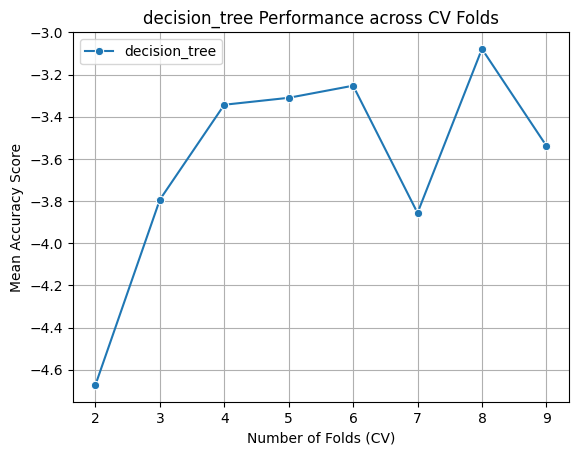

,CV,Neighbors,Mean Score
Model,,,
knn,2,2.0,-4.48
knn,2,3.0,-4.10
knn,2,4.0,-4.17
knn,2,5.0,-4.34
knn,2,6.0,-4.35
...,...,...,...
knn,9,5.0,-3.17
knn,9,6.0,-3.25
knn,9,7.0,-3.35


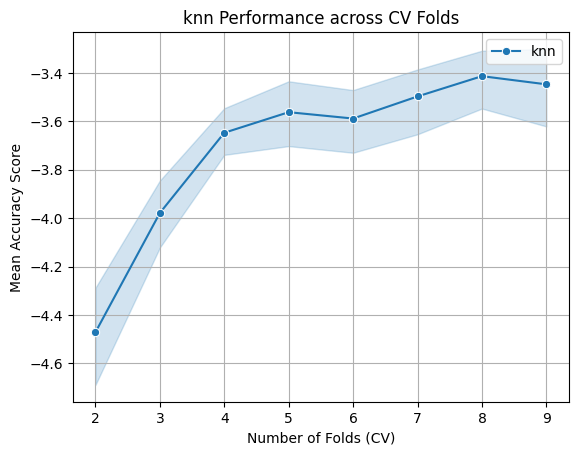

,CV,Neighbors,Mean Score
Model,,,
linear_regression,2,NaN,-1.747993
linear_regression,3,NaN,-1.662247
linear_regression,4,NaN,-1.627968
linear_regression,5,NaN,-1.601573
linear_regression,6,NaN,-1.597532
linear_regression,7,NaN,-1.606661
linear_regression,8,NaN,-1.608664
linear_regression,9,NaN,-1.599290


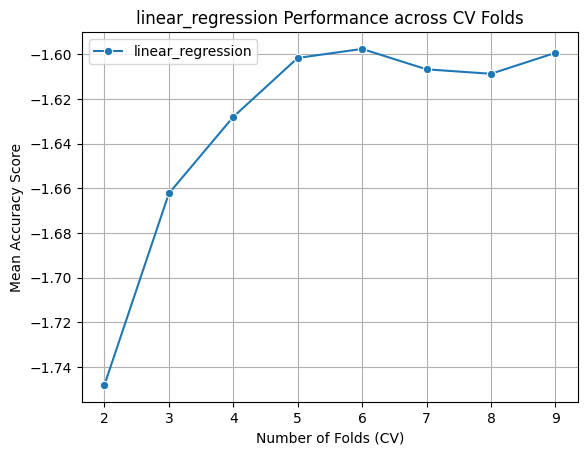

,CV,Neighbors,Mean Score
Model,,,
random_forest,2,NaN,-2.505659
random_forest,3,NaN,-2.108870
random_forest,4,NaN,-2.063739
random_forest,5,NaN,-2.121595
random_forest,6,NaN,-1.987667
random_forest,7,NaN,-2.095280
random_forest,8,NaN,-2.122307
random_forest,9,NaN,-2.052532


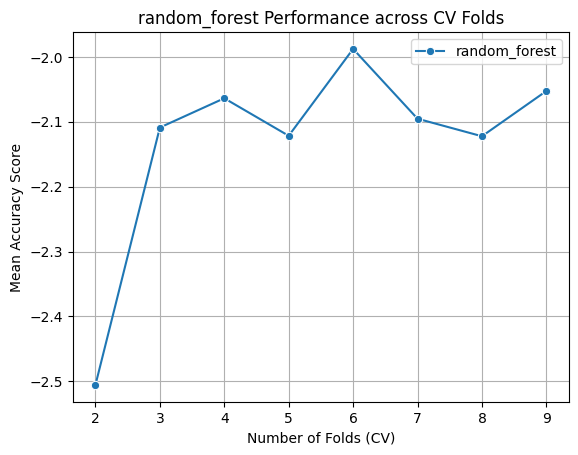

In [ ]:
for model_name, group in grouped_df:
    display(group)
    sns.lineplot(data=group, x='CV', y='Mean Score', hue='Model', marker='o')

    plt.title(f'{model_name} Performance across CV Folds')
    plt.xlabel('Number of Folds (CV)')
    plt.ylabel('Mean Accuracy Score')
    plt.grid(True)
    plt.legend()
    plt.show()

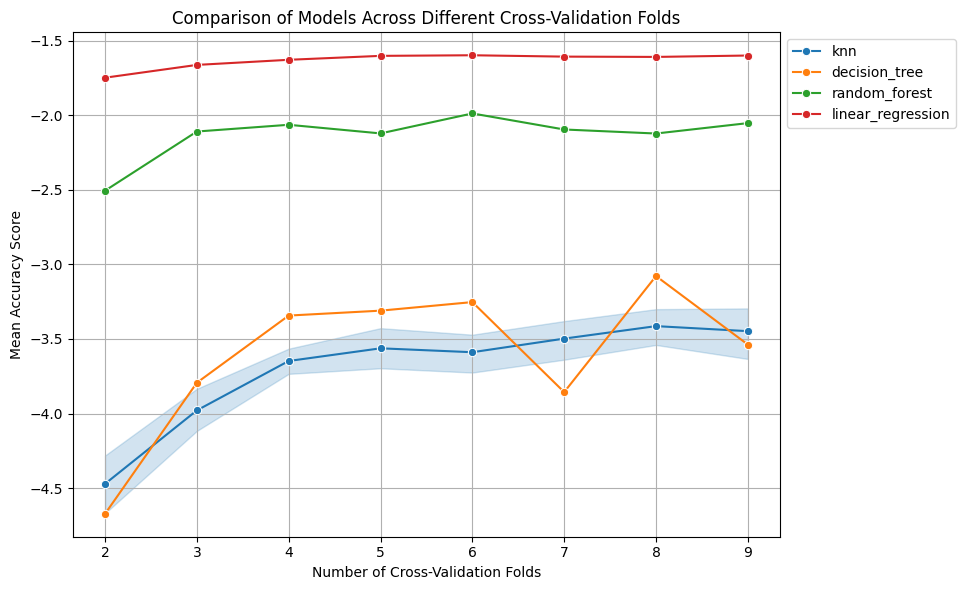

In [ ]:
# Plot the comparison across different CV folds for each model
plt.figure(figsize=(8, 6))

plt.title('Comparison of Models Across Different Cross-Validation Folds')
sns.lineplot(data=df, x='CV', y='Mean Score',hue='Model', marker='o')

plt.xlabel('Number of Cross-Validation Folds')
plt.ylabel('Mean Accuracy Score')
plt.legend(title='Model')
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [ ]:
max_row = df[df['Mean Score'] == df['Mean Score'].max()]
print(max_row)

                   CV  Neighbors  Mean Score
Model                                       
linear_regression   6        NaN   -1.597532


In [ ]:
max_row.index[0]

'linear_regression'

In [ ]:
results = {}

In [ ]:
baseline = DummyRegressor(strategy='mean')
baseline.fit(arm_test_ftrs, arm_test_tgts)
base_preds = baseline.predict(arm_test_ftrs)
base_mse = mean_squared_error(base_preds,arm_test_tgts)
base_r2_sklearn = r2_score(arm_test_tgts, base_preds)
print(base_mse)

2293.0764136852667


In [ ]:
best_dt_model = models[max_row.index[0]]()
fit = best_dt_model.fit(arm_train_ftrs, arm_train_tgts)
test_predictions = fit.predict(arm_test_ftrs)
test_mse = mean_squared_error(test_predictions,arm_test_tgts)
test_r2 = r2_score(arm_test_tgts,test_predictions)
results['R^2'] = test_r2
results['MSE'] = test_mse

In [ ]:
df = pd.DataFrame(results, index=[0])
df['Norm_MSE'] = df['MSE'] / base_mse
df['1-R^2'] = 1 - df['R^2']
display(df)



,R^2,MSE,Norm_MSE,1-R^2
0,0.999301,1.603256,0.000699,0.000699


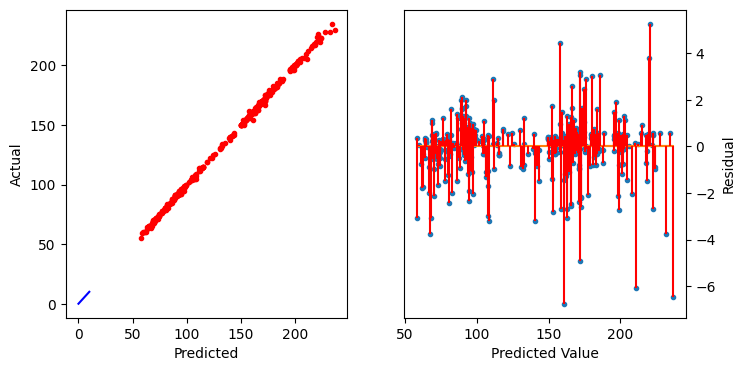

In [ ]:
def regression_residuals(ax, predicted, actual,
                         show_errors=None, right=False):
  ''' figsize -> subplots;
  predicted/actual data -> columns of a DataFrame
  errors -> "all" or sequence of indices '''

  df = pd.DataFrame({'actual':actual,
                     'predicted':predicted})
  df['error'] = df.actual - df.predicted
  ax.plot(df.predicted, df.error, '.')
  ax.plot(df.predicted, np.zeros_like(predicted), '-')
  if right:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
  ax.set_xlabel('Predicted Value')
  ax.set_ylabel('Residual')

  if show_errors == 'all':
    show_errors = range(len(df))
  if show_errors:
    preds = df.predicted.iloc[show_errors]
    errors = df.error.iloc[show_errors]
    ax.vlines(preds, 0, errors, 'r')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(test_predictions, arm_test_tgts, 'r.',
   [0, 10], [0, 10], 'b-')

# perfect line
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
regression_residuals(ax2, test_predictions, arm_test_tgts,
  'all', right=True)

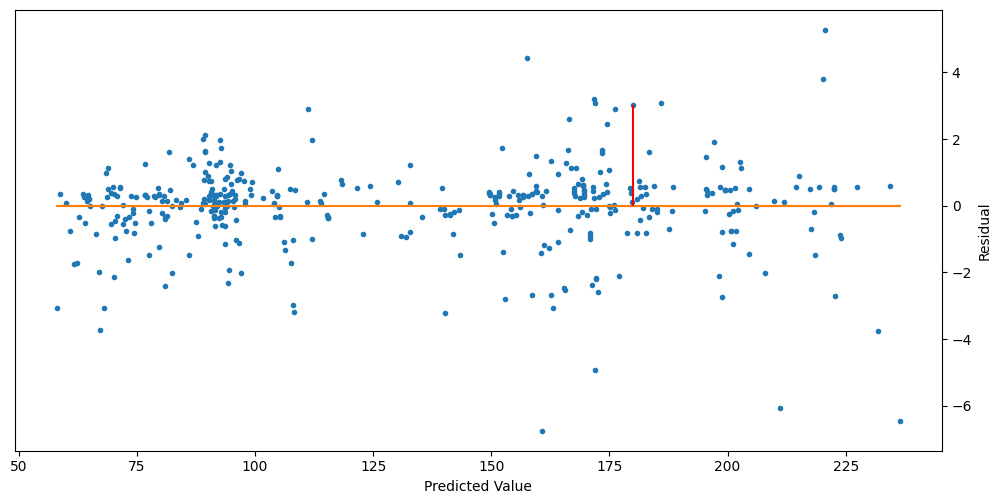

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5),sharex=True, sharey=True)
fig.tight_layout()

# first axis (axes[0])
regression_residuals(axes, test_predictions, arm_test_tgts, [-20], True)